In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Survival regression with lifelines package

In [2]:
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

In [18]:
surv = pd.read_csv("survivalv2.csv")
surv["DATE"] = pd.to_datetime(surv["DATE"])
surv["YEAR"] = surv["DATE"].dt.year

In [19]:
surv[surv["DATE"].dt.year > 2009]

,FOD_ID,FIPS_NAME,FIPS_CODE,DATE,NEXTDATE,SurvivalTime,FireIncidence,fire_size,max_drybulbtemp,min_drybulbtemp,...,max_fuelmoisture,min_fuelmoisture,max_maxtemp,min_mintemp,max_maxhumid,min_minhumid,sum_precip_duration,sum_precip_amt,med_precip_amt,YEAR
748,201190984,Placer,61,2011-06-05,2011-06-09,4.0,1,0.10,53.25,53.25,...,15.000000,15.000000,59.00,36.50,95.50,36.50,0.25,12.5,12.5,2011
749,300306886,Placer,61,2015-09-25,2015-09-25,0.0,1,0.07,81.60,81.60,...,4.000000,4.000000,83.60,61.60,36.00,12.00,0.00,0.0,0.0,2015
1095,1473309,El Dorado,17,2010-06-13,2010-06-13,0.0,1,0.10,82.20,82.20,...,5.000000,5.000000,82.80,49.00,73.60,19.00,0.00,0.0,0.0,2010
1096,1473312,El Dorado,17,2010-06-15,2010-06-15,0.0,1,0.10,85.20,77.40,...,5.000000,5.000000,86.20,52.00,72.60,15.00,0.00,0.0,0.0,2010
1097,1473318,El Dorado,17,2010-06-17,2010-06-18,1.0,1,0.50,77.00,77.00,...,4.000000,4.000000,77.40,42.60,68.20,14.60,0.00,0.0,0.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26041,300331103,Marin,41,2015-06-08,2015-07-29,51.0,1,0.01,92.50,61.00,...,15.000000,6.000000,92.50,46.00,99.50,28.75,4.75,2082.5,0.0,2015
26042,300321143,Marin,41,2015-07-29,2015-08-31,33.0,1,0.10,96.75,56.25,...,22.000000,4.500000,98.75,51.25,99.75,12.25,7.25,90.0,0.0,2015
26043,300331100,Marin,41,2015-08-31,2015-09-11,11.0,1,0.12,96.75,67.75,...,10.000000,4.666667,99.00,53.50,100.00,12.25,0.50,5.0,0.0,2015
26044,300333632,Marin,41,2015-09-11,2015-09-11,0.0,1,1.00,96.00,76.25,...,7.000000,3.666667,98.50,51.75,82.50,9.00,0.00,0.0,0.0,2015


In [37]:
surv.iloc[26043]

FOD_ID                           300331100
FIPS_NAME                            Marin
FIPS_CODE                               41
DATE                   2015-08-31 00:00:00
NEXTDATE                        2015-09-11
SurvivalTime                            11
FireIncidence                            1
fire_size                             0.12
max_drybulbtemp                      96.75
min_drybulbtemp                      67.75
max_atm_moisture                     68.25
min_atm_moisture                      15.5
max_avg_windspeed                       14
min_avg_windspeed                     2.75
max_fuelmoisture                        10
min_fuelmoisture                   4.66667
max_maxtemp                             99
min_mintemp                           53.5
max_maxhumid                           100
min_minhumid                         12.25
sum_precip_duration                    0.5
sum_precip_amt                           5
med_precip_amt                           0
YEAR       

In [16]:
#surv = surv.drop(columns=["FOD_ID","FIPS_CODE","FIPS_NAME","DATE","NEXTDATE"])

In [20]:
26083*0.2

5216.6

In [21]:
surv_train=(surv[surv["DATE"].dt.year <= 2009]).drop(columns=["FOD_ID","FIPS_CODE","FIPS_NAME","DATE","NEXTDATE"])
surv_test=(surv[surv["DATE"].dt.year > 2009]).drop(columns=["FOD_ID","FIPS_CODE","FIPS_NAME","DATE","NEXTDATE"])

In [36]:
surv_train

,SurvivalTime,FireIncidence,fire_size,max_drybulbtemp,min_drybulbtemp,max_atm_moisture,min_atm_moisture,max_avg_windspeed,min_avg_windspeed,max_fuelmoisture,min_fuelmoisture,max_maxtemp,min_mintemp,max_maxhumid,min_minhumid,sum_precip_duration,sum_precip_amt,med_precip_amt,YEAR
0,3.0,1,0.3,48.0,40.0,50.0,45.0,11.0,3.0,22.0,9.0,49.0,28.0,100.0,45.0,0.0,0.0,0.0,1993
1,0.0,1,150.0,72.0,72.0,40.0,40.0,6.0,6.0,9.0,9.0,72.0,45.0,64.0,30.0,0.0,0.0,0.0,1993
2,1.0,1,20.0,74.0,69.0,43.0,38.0,3.0,2.0,7.0,7.0,74.0,50.0,65.0,38.0,0.0,0.0,0.0,1993
3,2.0,1,0.1,66.0,66.0,51.0,51.0,5.0,5.0,9.0,9.0,70.0,48.0,81.0,44.0,0.0,0.0,0.0,1993
4,0.0,1,2.0,46.0,46.0,79.0,79.0,9.0,9.0,25.0,25.0,68.0,44.0,100.0,46.0,3.0,510.0,510.0,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,3.0,1,1.5,69.0,69.0,60.0,60.0,4.0,4.0,12.0,12.0,71.0,56.0,100.0,58.0,0.0,0.0,0.0,1995
26079,4.0,1,30.0,67.0,67.0,55.0,55.0,6.0,6.0,7.0,7.0,67.0,50.0,100.0,55.0,0.0,0.0,0.0,1995
26080,55.0,1,0.1,67.0,65.0,85.0,62.0,10.0,4.0,26.0,13.0,77.0,51.0,100.0,53.0,3.0,90.0,45.0,1998
26081,7.0,1,0.3,79.0,75.0,58.0,55.0,3.0,3.0,93.0,14.0,86.0,49.0,100.0,46.0,0.0,0.0,0.0,1998


In [40]:
surv_test

,SurvivalTime,FireIncidence,fire_size,max_drybulbtemp,min_drybulbtemp,max_atm_moisture,min_atm_moisture,max_avg_windspeed,min_avg_windspeed,max_fuelmoisture,min_fuelmoisture,max_maxtemp,min_mintemp,max_maxhumid,min_minhumid,sum_precip_duration,sum_precip_amt,med_precip_amt,YEAR
748,4.0,1,0.10,53.25,53.25,56.25,56.25,3.75,3.75,15.000000,15.000000,59.00,36.50,95.50,36.50,0.25,12.5,12.5,2011
749,0.0,1,0.07,81.60,81.60,19.40,19.40,7.60,7.60,4.000000,4.000000,83.60,61.60,36.00,12.00,0.00,0.0,0.0,2015
1095,0.0,1,0.10,82.20,82.20,19.00,19.00,6.60,6.60,5.000000,5.000000,82.80,49.00,73.60,19.00,0.00,0.0,0.0,2010
1096,0.0,1,0.10,85.20,77.40,25.80,24.00,7.80,5.40,5.000000,5.000000,86.20,52.00,72.60,15.00,0.00,0.0,0.0,2010
1097,1.0,1,0.50,77.00,77.00,18.20,18.20,5.60,5.60,4.000000,4.000000,77.40,42.60,68.20,14.60,0.00,0.0,0.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26041,51.0,1,0.01,92.50,61.00,76.25,28.75,8.50,2.75,15.000000,6.000000,92.50,46.00,99.50,28.75,4.75,2082.5,0.0,2015
26042,33.0,1,0.10,96.75,56.25,96.75,18.50,14.25,3.00,22.000000,4.500000,98.75,51.25,99.75,12.25,7.25,90.0,0.0,2015
26043,11.0,1,0.12,96.75,67.75,68.25,15.50,14.00,2.75,10.000000,4.666667,99.00,53.50,100.00,12.25,0.50,5.0,0.0,2015
26044,0.0,1,1.00,96.00,76.25,24.00,11.00,7.50,2.75,7.000000,3.666667,98.50,51.75,82.50,9.00,0.00,0.0,0.0,2015


In [22]:
cph = CoxPHFitter()
cph.fit(surv_train,"SurvivalTime",event_col="FireIncidence")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 20867 total observations, 0 right-censored observations>
             duration col = 'SurvivalTime'
                event col = 'FireIncidence'
      baseline estimation = breslow
   number of observations = 20867
number of events observed = 20867
   partial log-likelihood = -185036.61
         time fit was run = 2020-11-21 16:17:51 UTC

---
                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                   
fire_size            -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
max_drybulbtemp      -0.02       0.98       0.00            -0.03            -0.01                 0.97                 0.99
min_drybulbtemp       0.02       1.02       0.00             0.02             0.03                 1.02                 1.03
max_atm_moisture     -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
min_atm_moisture     -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
max_avg_windspeed    -0.03       0.97       0.00            -0.04            -0.02                 0.96                 0.98
min_avg_windspeed     0.06       1.07       0.01             0.05             0.07                 1.06                 1.08
max_fuelmoisture      0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
min_fuelmoisture      0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01
max_maxtemp           0.01       1.01       0.00             0.00             0.01                 1.00                 1.01
min_mintemp           0.01       1.01       0.00             0.01             0.01                 1.01                 1.01
max_maxhumid          0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
min_minhumid         -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
sum_precip_duration   0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
sum_precip_amt       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
med_precip_amt        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
YEAR                  0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

                        z      p   -log2(p)
covariate                                  
fire_size           -3.37 <0.005      10.39
max_drybulbtemp     -6.60 <0.005      34.49
min_drybulbtemp     10.21 <0.005      78.90
max_atm_moisture    -1.41   0.16       2.65
min_atm_moisture    -1.35   0.18       2.50
max_avg_windspeed   -7.21 <0.005      40.70
min_avg_windspeed   12.67 <0.005     119.81
max_fuelmoisture     0.45   0.65       0.61
min_fuelmoisture     0.56   0.58       0.79
max_maxtemp          3.01 <0.005       8.59
min_mintemp          8.00 <0.005      49.55
max_maxhumid         2.46   0.01       6.16
min_minhumid        -0.12   0.91       0.14
sum_precip_duration  2.93 <0.005       8.20
sum_precip_amt      -0.87   0.38       1.38
med_precip_amt       0.01   1.00       0.01
YEAR                 1.28   0.20       2.32
---
Concordance = 0.66
Partial AIC = 370107.22
log-likelihood ratio test = 3287.76 on 17 df
-log2(p) of ll-ratio test = inf

In [55]:
cph.confidence_intervals_

,95% lower-bound,95% upper-bound
covariate,,
fire_size,-0.000023,-0.000006
max_drybulbtemp,-0.025848,-0.014010
min_drybulbtemp,0.019335,0.028520
max_atm_moisture,-0.004016,0.000658
min_atm_moisture,-0.005212,0.000962
max_avg_windspeed,-0.039903,-0.022846
min_avg_windspeed,0.053616,0.073238
max_fuelmoisture,-0.002660,0.004237
min_fuelmoisture,-0.003481,0.006234


In [23]:
cph.score(surv_test,scoring_method='concordance_index')

0.6489871535212266

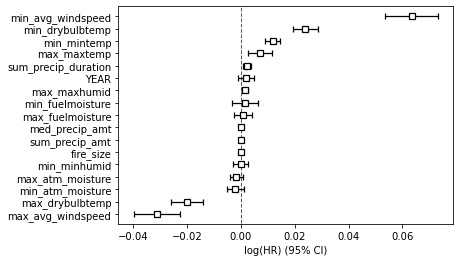

In [24]:
cph.plot()

Text(0, 0.5, 'Survival Probability')

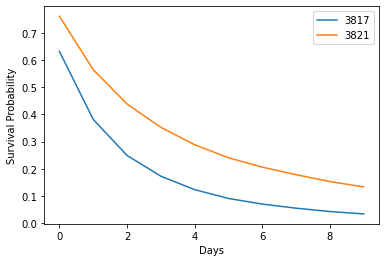

In [93]:
d_data = surv.iloc[[3817,3821],:]
cph.predict_survival_function(d_data).iloc[0:10].plot()
plt.xlabel("Days")
plt.ylabel("Survival Probability")

In [94]:
d_data.drop(columns=["FOD_ID","FIPS_CODE"]).transpose()

,3817,3821
FIPS_NAME,Siskiyou,Siskiyou
DATE,2011-09-15 00:00:00,2011-09-27 00:00:00
NEXTDATE,2011-09-16,2011-10-01
SurvivalTime,1,4
FireIncidence,1,1
fire_size,0.1,1
max_drybulbtemp,70.1111,70.8333
min_drybulbtemp,70.1111,59.2778
max_atm_moisture,38,58.7778
min_atm_moisture,38,33.3889


In [97]:
cph.predict_expectation(d_data)

3817    1.788072
3821    5.360624
dtype: float64

In [106]:
a=pd.DataFrame(cph.predict_survival_function(d_data).iloc[0])
a["Probability of fire on day 0"] = a[0.0]
a.drop(columns=0.0)

,Probability of fire on day 0
3817,0.632811
3821,0.762497


### Survival regression with scikit-survival package

In [27]:
from sksurv.datasets import load_gbsg2
from sksurv.datasets import get_x_y
from sksurv.ensemble import RandomSurvivalForest
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sklearn.model_selection import train_test_split

In [28]:
X,y = get_x_y(surv,attr_labels=["FireIncidence","SurvivalTime"],pos_label=1)

In [29]:
X

,FOD_ID,FIPS_NAME,FIPS_CODE,DATE,NEXTDATE,fire_size,max_drybulbtemp,min_drybulbtemp,max_atm_moisture,min_atm_moisture,...,max_fuelmoisture,min_fuelmoisture,max_maxtemp,min_mintemp,max_maxhumid,min_minhumid,sum_precip_duration,sum_precip_amt,med_precip_amt,YEAR
0,1361688,Placer,61,1993-04-27,1993-04-30,0.3,48.0,40.0,50.0,45.0,...,22.0,9.0,49.0,28.0,100.0,45.0,0.0,0.0,0.0,1993
1,1360401,Placer,61,1993-05-10,1993-05-10,150.0,72.0,72.0,40.0,40.0,...,9.0,9.0,72.0,45.0,64.0,30.0,0.0,0.0,0.0,1993
2,1358702,Placer,61,1993-05-22,1993-05-23,20.0,74.0,69.0,43.0,38.0,...,7.0,7.0,74.0,50.0,65.0,38.0,0.0,0.0,0.0,1993
3,1360403,Placer,61,1993-05-24,1993-05-26,0.1,66.0,66.0,51.0,51.0,...,9.0,9.0,70.0,48.0,81.0,44.0,0.0,0.0,0.0,1993
4,1358703,Placer,61,1993-05-26,1993-05-26,2.0,46.0,46.0,79.0,79.0,...,25.0,25.0,68.0,44.0,100.0,46.0,3.0,510.0,510.0,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,1330668,Santa Cruz,87,1995-10-15,1995-10-18,1.5,69.0,69.0,60.0,60.0,...,12.0,12.0,71.0,56.0,100.0,58.0,0.0,0.0,0.0,1995
26079,1330605,Santa Cruz,87,1995-10-18,1995-10-22,30.0,67.0,67.0,55.0,55.0,...,7.0,7.0,67.0,50.0,100.0,55.0,0.0,0.0,0.0,1995
26080,1330885,Santa Cruz,87,1998-05-22,1998-07-16,0.1,67.0,65.0,85.0,62.0,...,26.0,13.0,77.0,51.0,100.0,53.0,3.0,90.0,45.0,1998
26081,1330913,Santa Cruz,87,1998-07-16,1998-07-23,0.3,79.0,75.0,58.0,55.0,...,93.0,14.0,86.0,49.0,100.0,46.0,0.0,0.0,0.0,1998


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)

### Random Survival Forests

In [1]:
rsf = RandomSurvivalForest(n_estimators=500,min_samples_leaf=10,
                           max_features="log2",oob_score = True)
rsf.fit(X_train, y_train)

In [19]:
rsf.oob_score_

0.6073802749314757

In [20]:
rsf.score(X_test,y_test)

0.6127179636886249

In [21]:
#Risk scores
rsf.predict(X.iloc[150:160,:])

array([10.37047616, 10.79683834,  8.70452179,  9.97302759,  8.83400686,
       10.63095399, 11.6672933 ,  9.87974096, 11.2846895 ,  9.343078  ])

In [22]:
cph.predict_expectation(surv.iloc[150:160,:])

150    1.656592
151    1.677053
152    2.934262
153    2.284835
154    2.126961
155    2.302779
156    1.326145
157    1.681569
158    1.967943
159    2.233594
dtype: float64

### Cox Survival Regression

In [40]:
m = CoxPHSurvivalAnalysis(alpha=1)

In [41]:
m.fit(X_train,y_train)

CoxPHSurvivalAnalysis(alpha=1)

In [42]:
m.score(X_test,y_test)

0.6601049011663827

In [32]:
m.coef_

array([-7.25732319e-06, -1.47630939e-02,  1.70902215e-02, -2.59219954e-03,
       -1.26621347e-03, -2.88852856e-02,  5.62037314e-02,  2.53692093e-03,
       -1.24828761e-03,  5.10369475e-03,  9.27540372e-03,  1.50187696e-03,
        4.78273204e-04,  1.07459240e-03, -9.01281834e-06, -2.53807966e-06,
        2.34512717e-03])

In [43]:
m.predict(X.iloc[100:105,])

array([6.07369045, 6.09477003, 6.18754889, 6.10365124, 5.77892382])

In [33]:
arrs=m.predict_survival_function(X.iloc[56:62,:])

In [34]:
for i in [0,1,2,3,4,5]:
    print(sum(arrs[i].y))

2.201401126679504
4.483810056254158
3.2115276290887684
2.734498325544817
2.1304896558973545
2.3744840217084815


In [35]:
cph.predict_expectation(d_data)

1    2.482907
2    3.529760
3    2.586919
4    2.927881
dtype: float64

Comparison of rsf expected times with lifelines expected times

In [30]:
survsrf= rsf.predict_survival_function(X.iloc[56:62,:],return_array=True)
for i in survsrf:
    print(sum(i))

1.2490301009533982
0.9197638891638115
1.2904702842994638
2.505027949810769
1.1424459271722436
1.8226079886487785


Compare plots

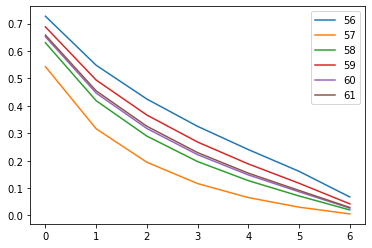

In [31]:
d_data = surv.iloc[56:62,:]
cph.predict_survival_function(d_data).plot()

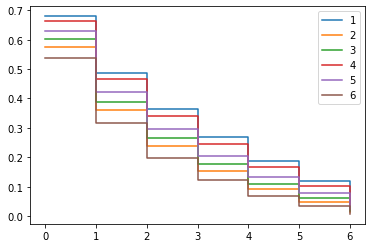

In [32]:

_, ax = plt.subplots()
for i,fn in enumerate(arrs):
    line, = ax.step(rsf.event_times_, fn(rsf.event_times_), where="post",label=str(i+1))
ax.legend()

### Data cleaning

In [33]:
survival = pd.read_csv("survivaldata.csv").drop(columns=["FireDate"])
survival['Week']=pd.to_datetime(survival['Week'])

In [34]:
survival = pd.read_csv("survivaldata.csv")

In [35]:
survival

,Week,County,FireDate,SurvivalTime,FireIncidence
0,27-Apr-97,Shasta,5/1/1997,4,1
1,8-Jun-97,Lassen,6/11/1997,3,1
2,8-Jun-97,Modoc,6/10/1997,2,1
3,15-Jun-97,Modoc,6/21/1997,6,1
4,6-Jul-97,Modoc,7/9/1997,3,1
...,...,...,...,...,...
3749,29-Nov-15,SanBernardino,12/4/2015,5,1
3750,6-Dec-15,Riverside,12/6/2015,0,1
3751,13-Dec-15,Riverside,12/13/2015,0,1
3752,20-Dec-15,Riverside,12/20/2015,0,1


In [36]:
fires = pd.read_csv("firedata.csv")
fires['Week']=pd.to_datetime(fires['Week'])

In [37]:
fires

,Week,County,BigFireCount,TotalFireCount,FireSize
0,1997-04-27,Shasta,0,1,0.10
1,1997-06-08,Lassen,0,1,0.10
2,1997-06-08,Modoc,0,2,0.20
3,1997-06-15,Modoc,1,1,1.00
4,1997-07-06,Modoc,1,1,1.00
...,...,...,...,...,...
3749,2015-11-29,SanBernardino,0,1,0.10
3750,2015-12-06,Riverside,3,13,2.54
3751,2015-12-13,Riverside,2,4,2.11
3752,2015-12-20,Riverside,0,5,0.41


In [38]:
weather = pd.read_csv("weatherweeks.csv")
weather['Week']=pd.to_datetime(weather['Week'])

In [39]:
weather

,Week,County,AvgAtmMoisture,AvgAvgWindspeed,AvgDrybulbtemp,AvgFuelmoisture,AvgMaxhumid,AvgMaxtemp,AvgMinhumid,AvgMintemp,AvgPrecipAmt,AvgPrecipDuration,AvgWindAzimuth
0,1993-03-21,Yuba,86,2,52,25,100,52,86,41,300.0,8,203
1,1993-04-04,Amador,51,6,52,17,92,53,51,35,40.0,1,214
2,1993-04-04,ElDorado,53,3,49,17,100,49,53,29,30.0,1,338
3,1993-04-04,Placer,49,5,40,22,100,41,49,29,0.0,0,135
4,1993-04-04,Yuba,75,4,50,18,100,63,45,38,300.0,2,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12392,2019-12-22,Marin,60,7,53,14,90,55,49,41,193.0,2,273
12393,2019-12-22,Riverside,53,6,51,15,79,57,33,40,103.0,2,166
12394,2019-12-22,SanBernardino,30,10,49,10,58,53,24,35,27.0,1,202
12395,2019-12-29,Marin,84,6,53,19,100,58,54,43,727.0,5,190


In [40]:
for i in fires.columns[2:]:
    survival[i] = np.nan

In [41]:
for i in weather.columns[2:]:
    survival[i] = np.nan

In [42]:
for col in fires.columns[2:]:
    print(col)

BigFireCount
TotalFireCount
FireSize


In [43]:
counties = weather["County"].unique()

In [2]:
for idx in range(len(survival['Week'])):
    #add survival zeroes in if necessary
    pastweek = survival["Week"][idx] - pd.DateOffset(days=7)
    cty = survival.County[idx]
    fireinfo = fires.query("Week==@pastweek and County==@cty")
    weatherinfo = weather.query("Week==@pastweek and County==@cty")
    try:
        for col in fires.columns[2:]:
            #print(idx,col)
            survival.loc[idx,col] = fireinfo[col].values[0]
        for col in weather.columns[2:]:
            survival.loc[idx,col] = weatherinfo[col].values[0]
    except:
        continue

In [ ]:
survival = survival.dropna()

In [ ]:
survival

In [ ]:
survival.to_csv("complete.csv",index=False)

### linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LinearRegression().fit(survival.drop(columns=["Week","SurvivalTime","County"]),survival['SurvivalTime']).score(survival.drop(columns=["Week","SurvivalTime","County"]),survival['SurvivalTime'])

In [ ]:
survival